In [160]:
# Importing Libraries
library(tidyverse)
library(repr)
library(tidymodels)

In [161]:
player_data_url <- "https://raw.githubusercontent.com/MohakB3/dsci100-project/refs/heads/main/data/players.csv"
sessions_data_url <- "https://raw.githubusercontent.com/MohakB3/dsci100-project/refs/heads/main/data/sessions.csv"

player_data <- read_csv(player_data_url)
sessions_data <- read_csv(sessions_data_url)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [162]:
head(player_data)
player_mean_quantitative_data <- player_data |>
    summarize(mean_age = mean(Age, na.rm = TRUE), mean_played_hours = mean(played_hours, na.rm = TRUE))
player_mean_quantitative_data

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


mean_age,mean_played_hours
<dbl>,<dbl>
21.13918,5.845918


## **Chosen Broad Question:** What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
### **Specific Question:** Can [explanatory variable(s)] predict [response variable] in [dataset]?

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_density()`).”


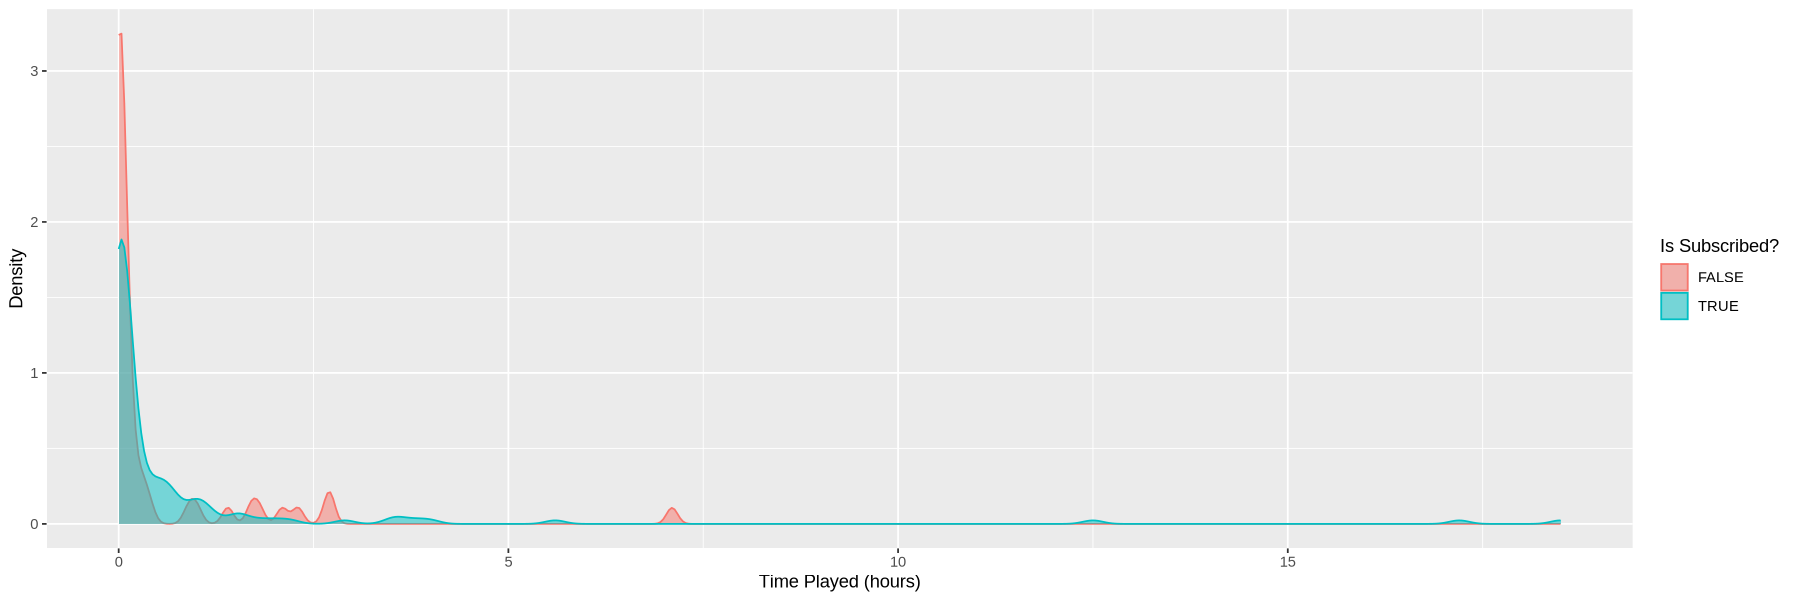

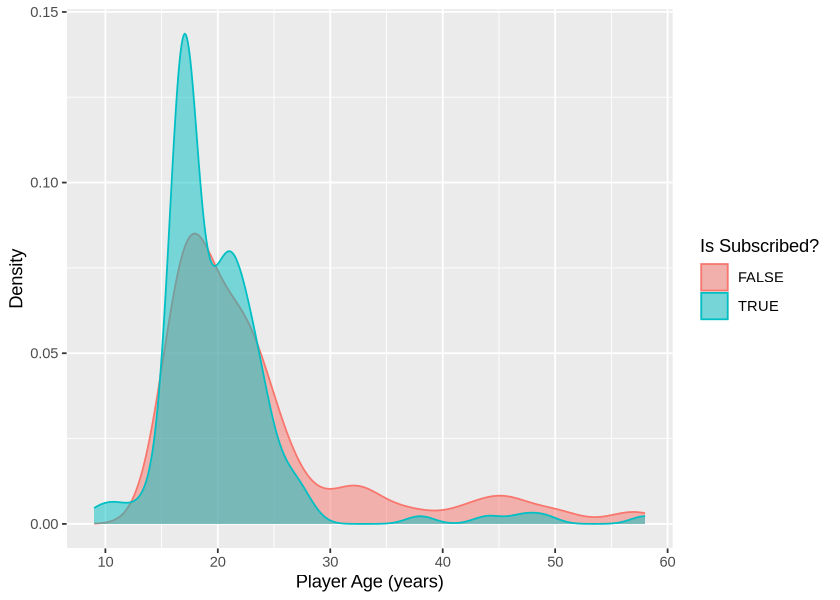

In [176]:
options(repr.plot.width = 15, repr.plot.height = 5)
player_time_plot <- player_data |>
    select(played_hours, subscribe) |>
    filter(played_hours >= 0, played_hours <= 20) |>
    ggplot(aes(x=played_hours, fill = subscribe, colour = subscribe)) + 
    geom_density(alpha = 0.5) +
    labs(x="Time Played (hours)",y="Density",fill = "Is Subscribed?", colour = "Is Subscribed?")

player_time_plot

options(repr.plot.width = 7, repr.plot.height = 5)
player_age_plot <- player_data |>
    select(Age, subscribe) |>
    ggplot(aes(x=Age, fill = subscribe, colour = subscribe)) + 
    geom_density(alpha = 0.5) +
    labs(x="Player Age (years)",y="Density",fill = "Is Subscribed?", colour = "Is Subscribed?")

player_age_plot